# Анализ покупок международного интернет-магазина компьютерных игр «Стримчик»

Нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Перед нами стоит задача выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг - компьютерных игр и присваивает им подходящую возрастную категорию.
- Данные за 2016 год могут быть неполными.

## Ход работы:

**Шаг 1.
Открыть файл с данными и изучить общую информацию.**

**Шаг 2.
Подготовить данные.**
Заменить названия столбцов (привести к нижнему регистру);
Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
Обработать пропуски при необходимости:
Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
Описать причины, которые могли привести к пропускам;
Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
Посчитайть суммарные продажи во всех регионах и записать их в отдельный столбец.

**Шаг 3. Проведите исследовательский анализ данных.**
Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Взять данные за соответствующий актуальный период. Актуальный период определить в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайть в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
Соотнести выводы с продажами игр на других платформах.
Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4. Составить портрет пользователя каждого региона.**
Определить для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Описать различия в долях продаж.
Самые популярные жанры (топ-5). Пояснить разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5. Проверить гипотезы.**
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задать самостоятельно пороговое значение alpha.
Пояснить:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

**Шаг 6. Общий вывод**

Загрузка библиотек.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

**Шаг 1. Загрузка данных**. Изучение общей информации о данных.

In [2]:
try:
    df_games = pd.read_csv ('games.csv')
except:
    print('Unknown Error')

In [3]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Первичное ознакомление с информацией о структуре данных позволило сделать выводы, что необходимо:**

- привести наименования всех столбцов к нижнему регистру;
- преобразовать типы данных в столбцах Year_of_Release, User_Score;
- заполнить пропуски по мере необходимости.

#### Шаг 2. Предобработка данных

Проверим наличие и процент пропусков.

In [5]:
df_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
percent_missing = df_games.isnull().sum() * 100 / len(df_games)
display(percent_missing)

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

Больше всего пропусков в столбцах Critic_Score - 51%, User_Score и Rating - по 40% от общего объема данных.        

In [7]:
df_games.columns = df_games.columns.str.lower()

In [8]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Привели названия столбцов к нижнему регистру. Проверим наличие дубликатов строк.

In [9]:
df_games.duplicated().sum()

0

Явные дубликаты в датафрейме отсутствуют.

In [10]:
df_games['name'].duplicated().sum()

5155

5155 дубликатов в названиях игр. Оставим только первые из них, при условии совпадения также года релиза и платформы. Сохраним в переменной размерность датасета после удаления неявных дубликатов.

In [11]:
len1 = len(df_games)
df_games = df_games.drop_duplicates(subset=['name', 'year_of_release', 'platform'], keep='first')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Проверим, какими значениями представлены категориальные признаки: rating, platform, genre.

In [12]:
df_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [13]:
df_games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [14]:
df_games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Значения в столбцах rating, platform, genre не содержат неявных дубликатов.

In [15]:
#df_games.groupby('year_of_release')['year_of_release'].count()

In [16]:
#df_games['year_of_release'].value_counts()

Проверим, какие значения находятся в стоблце year_of_release. Переведем к значению типа int.

In [17]:
df_games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [18]:
df_games['year_of_release'] = df_games['year_of_release'].astype("Int64")
display(df_games['year_of_release'].isnull().sum())
df_games[df_games['year_of_release'].isna()].head(20)

269

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,<NA>,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [19]:
#df_games.head()

In [20]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


Поменяли тип данных в столбце year_of_release на int.

Также предстоит заменить тип данных в столбце user_score. Здесь встречается значение "tbd" ("To Be Determined"). Следовательно, это тот же NaN, который необходимо соответствующим образом обработать.

In [21]:
df_games['user_score'].isnull().sum()

6700

In [22]:
df_games['user_score'].loc[df_games['user_score'] == 'tbd'] = None

In [23]:
df_games['user_score'].isnull().sum()

9124

Еще раз проверим количество пропусков в датасете.

In [24]:
percent_missing = df_games.isnull().sum() * 100 / len(df_games)
display(percent_missing)

name                0.005983
platform            0.000000
year_of_release     1.609526
genre               0.005983
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319332
user_score         54.592234
rating             40.477473
dtype: float64

Количество пропусков в трех последних столбцах внушающее, заполнять их в таком количестве медианными значениями некорректно. Пропуски в столбце с именем и годом выпуска незначительные, эти строки можно удалить из датасета.



In [25]:
df_games = df_games.dropna(subset=['year_of_release'])
df_games = df_games.dropna(subset=['name'])
df_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [26]:
df_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [27]:
df_games['rating'].value_counts()

rating
E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

Чтобы понять, как заполнить пропуски в столбце rating (ESRB) обратимся к значениями, используемым для классификации рейтинга.

E       Everyone                Для всех (0+)

T       Teen                    13+

M       Mature                  Для взрослых (от 18 лет)

E10+    Everyone 10 and older   10+

EC      Early childhood         3+

K-A     Kids to Adults          Для всех (аналогично E)

RP      Rating Pending          Рейтинг ожидается

AO      Adults only             Только для взрослых (18+)

Следовательно необходимо заменить K-A на E, RP заполнить по аналогии с NaN.

In [28]:
df_games['rating'].loc[df_games['rating'] == 'K-A']= 'E'
df_games['rating'][df_games['rating'] == 'RP'] = None
df_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', None], dtype=object)

Пропуски в столбцах с оценками критиков и пользователей, а также возрастным рейтингом составляют от 40 до 55 %, это большое количество и такие пропуски можно заполнить методом ближайших соседей, предварительно закодировав категориальный тип данных rating.

In [29]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# кодирование категориального признака
encoder = LabelEncoder()
df_games['rating'] = encoder.fit_transform(df_games['rating'])

# заполнение пропусков с использованием KNNImputer
imputer = KNNImputer(n_neighbors=4)
df_games[['critic_score', 'user_score', 'rating']] = imputer.fit_transform(df_games[['critic_score', 'user_score', 'rating']])

Снова проверим дубликаты и пропуски.

In [30]:
df_games.duplicated().sum()

0

In [31]:
df_games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [32]:
(len1 - len(df_games)) / len1

0.016272808854322463

Всего удалили менее 1,6 % данных, что является допустимым.

In [33]:
percent_missing = df_games.isnull().sum() * 100 / len(df_games)
display(percent_missing)

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

Создадим столбец с суммой продаж по всем регионам.

In [34]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games['total_sales'] = pd.to_numeric(df_games['total_sales'])


В столбце с годом выпуска установим тип integer.

In [35]:
df_games['year_of_release'] = df_games['year_of_release'].astype(int)

df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.0,1.0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.25,7.0,7.0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.3,1.0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.0,1.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.25,7.0,7.0,31.38


In [36]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  float64
 11  total_sales      16443 non-null  float64
dtypes: float64(8), int32(1), object(3)
memory usage: 1.6+ MB


В столбце с пользовательским рейтингом поменяем тип данных на числовой.

В результате предобработки данных мы получили данные без пропусков (заполнили методом ближайших соседей), удалили небольшое количество строк, заменили типы данных на актуальные и посчитали общее количество продаж по всем регионам.

#### Шаг 3. Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

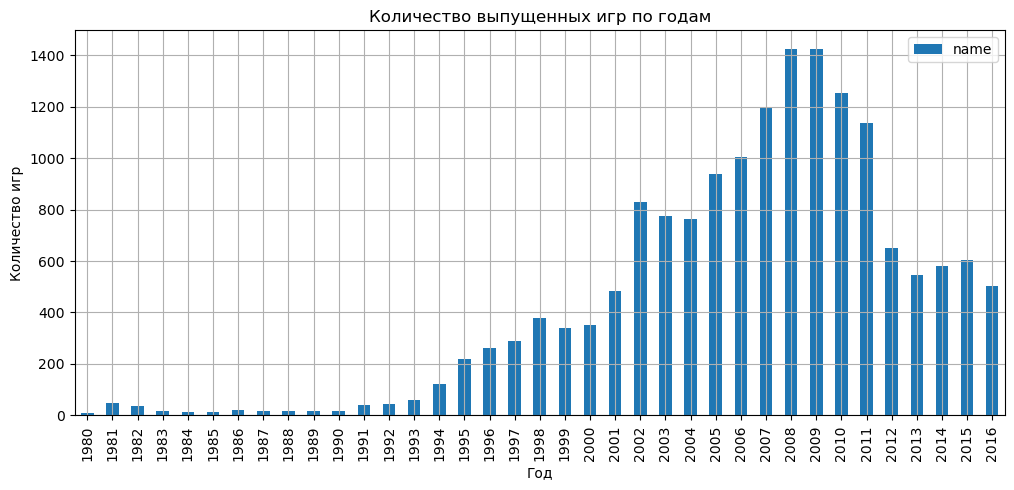

In [37]:
df_games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar' , grid=True, figsize=(12, 5))

plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

У нас представлены данные о вышедших играх с 1980 по 2016 год.
Отсортировав количество игр по годам их выпуска, мы видим, что до 1994 года продаж было мало, менее 100 в год, однако с 1994, продажи начали кратно расти, и в 2006 перевалили за 1000 шт. в год.
Рост продаж продолжался до 2008 и держался на том же уровне до 2009, но в 2010 год продажи пошли на спад. Далее с 2012 года продажи сократились примерно до уровня начала 00-ых и сохранялись римерно на том же уровне до 2016 включительно. 

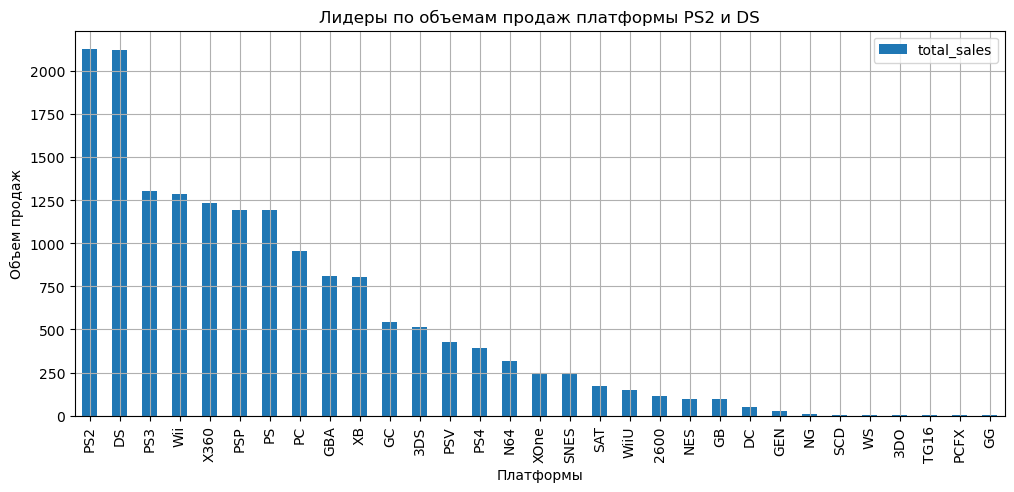

In [38]:
platform_total_sales = df_games.pivot_table(index='platform', values='total_sales', aggfunc='count').sort_values(
    by=['total_sales'], ascending=False)
platform_total_sales.plot(kind='bar' , grid=True, figsize=(12, 5))

plt.title("Лидеры по объемам продаж платформы PS2 и DS")
plt.xlabel("Платформы")
plt.ylabel("Объем продаж")
plt.show()

In [39]:
platform_top_5_all = platform_total_sales.index[:5].to_list()
display(f'Топ-5 самых популярных платформ {platform_top_5_all}')

"Топ-5 самых популярных платформ ['PS2', 'DS', 'PS3', 'Wii', 'X360']"

Наиболее популярные платформы за все время 'PS2', 'X360', 'PS3', 'Wii', 'DS'. При этом продажи PS2 и DS практически одинаковы.

Возьмем данные за **актуальный период**. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Примем за начальную точку 2014 год, т.к. оптимально в целях прогноризования использовать промежуток 2-3 года, а данные за 2016 год неполные.

Рассмотрим 5 платформ с наибольшей суммой продаж за актуальный период с 2014 года.

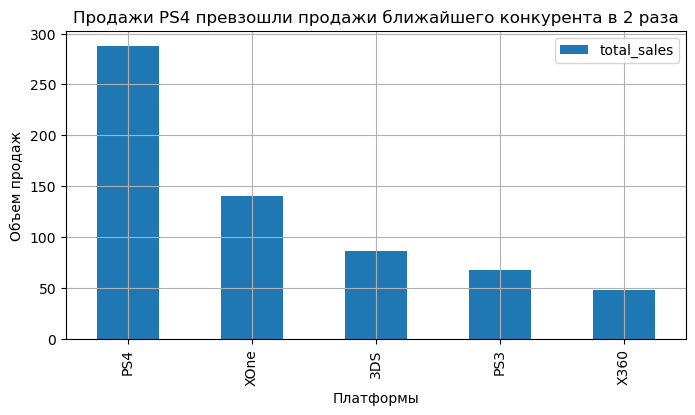

In [40]:
df_games2014 = df_games.query('year_of_release>=2014')
df_games_2014_pivot = df_games2014.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by=['total_sales'], ascending=False)
platform_top_5 = df_games_2014_pivot.index[:5].to_list()
df_games_2014_pivot = df_games_2014_pivot.query("platform in @platform_top_5")
df_games_2014_pivot.plot(kind='bar' , grid=True, figsize=(8, 4))
plt.title("Продажи PS4 превзошли продажи ближайшего конкурента в 2 раза")
plt.xlabel("Платформы")
plt.ylabel("Объем продаж")
plt.show()

Определим функцию для постоения сводной таблицы с суммой продаж за каждый год по каждой платформе и построим линейную диаграмму для каждой платформы на едином графике.

In [41]:
def platform_year_total_sale(name, data):
    slicee = data[(data['platform'] == name)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

In [42]:
df_games_top_5_all = df_games.query("platform in @platform_top_5_all")

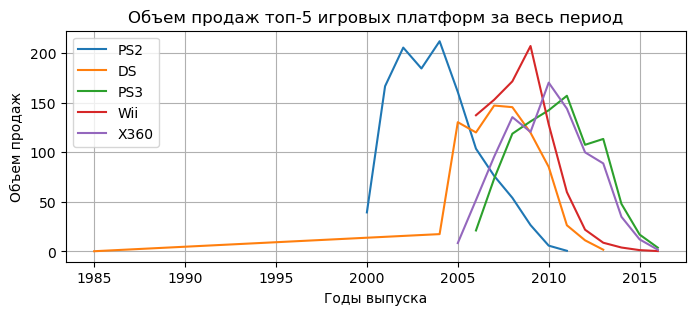

In [43]:
plt.figure(figsize=(8,3))
plt.title('Объем продаж топ-5 игровых платформ за весь период')
plt.xlabel('Годы выпуска')
plt.ylabel('Объем продаж')

for i in platform_top_5_all:
    sns.lineplot(data=platform_year_total_sale(i, df_games_top_5_all)['total_sales'], label=i)
    plt.legend()
plt.grid(True)
plt.show()

Из графика мы видим, что в среднем срок жизни каждой платформы составляет около 10 лет.

In [44]:
df_games_platform_top_5 = df_games2014.query("platform in @platform_top_5")

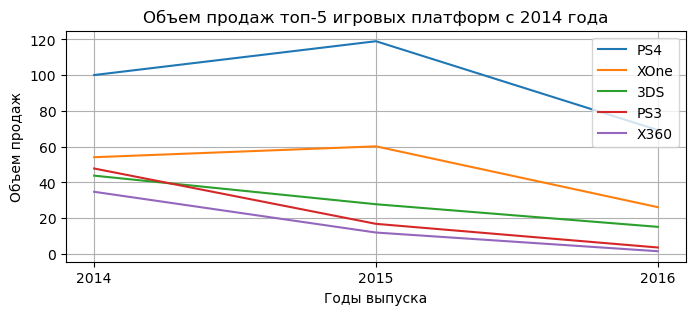

In [45]:
plt.figure(figsize=(8,3))
plt.title('Объем продаж топ-5 игровых платформ с 2014 года')
plt.xlabel('Годы выпуска')
plt.ylabel('Объем продаж')

for i in platform_top_5:
    sns.lineplot(data=platform_year_total_sale(i, df_games_platform_top_5)['total_sales'], label=i)
    plt.legend()
plt.grid(True)
plt.xticks(np.arange(min(df_games2014['year_of_release']), max(df_games2014['year_of_release'])+1, 1.0))
plt.show()

На графиках мы видим, что:
- Средний срок жизни платформы составляет 10 лет. 
- Cамые высокие продажи  за весь период год зафиксированы у  PS2 и DS.
- Поведение продаж примерно одинаковое (резкий взлет и плавное снижение) у X360, PS3 и 3DS.
- Самое резкое падение продаж произошло у WII с 2009 по 2012 год.
- Самые высокие продажи за прошедшие 3 года у PS4, кратно превышающие объемы продаж других платформ.
- Наиболее перспективные консоли на 2017 год являются PS4 и XOne, даже с учетом спада продаж игр в последние годы.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [46]:
df_games_platform_top_5.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,2014.965969,0.220654,0.203700,0.061850,0.064921,69.960079,6.744917,4.702443,0.551126
std,0.800476,0.511491,0.547368,0.244133,0.167507,9.491147,1.221110,2.248635,1.215718
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,1.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,67.000000,6.500000,2.000000,0.050000
50%,2015.000000,0.040000,0.040000,0.000000,0.010000,71.250000,7.000000,5.000000,0.140000
75%,2016.000000,0.190000,0.160000,0.050000,0.050000,72.750000,7.287500,7.000000,0.480000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.200000,7.000000,14.630000


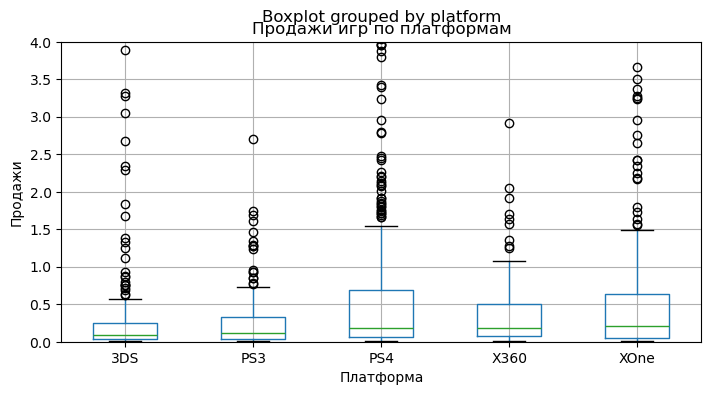

In [47]:
df_games_platform_top_5.boxplot(by='platform', column=['total_sales'], figsize=(8,4))
plt.ylim(0,4)
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

Согласно полученному графику медианный ценник на игры для PS4 чуть ниже, чем у основного конкурента XOne, однако стоимость продуктов в среднем выше. Медиана по всем платформам смещена к низу, то есть отличается от среднего в меньшую сторону.

Посмотрим, как влияют на продажи внутри платформы XOne отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

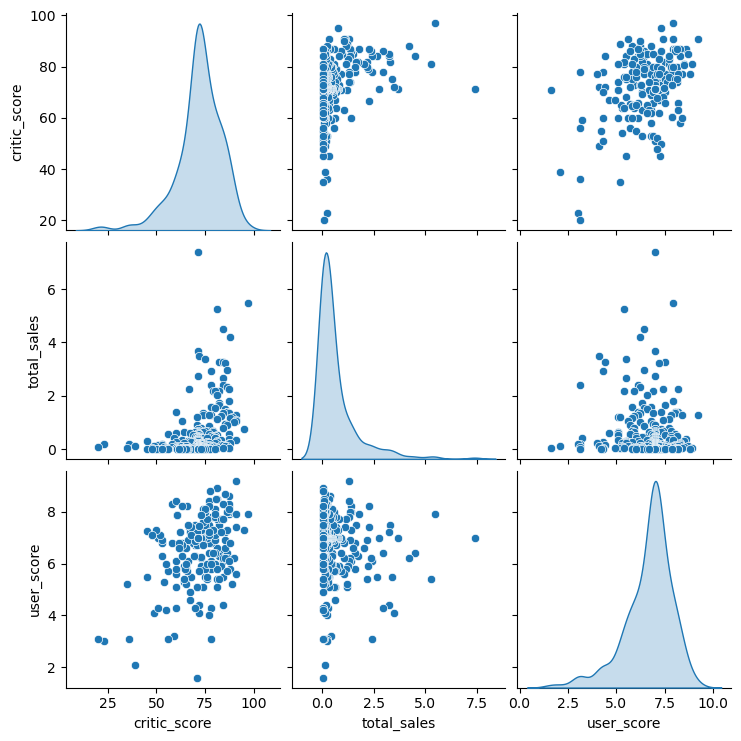

In [48]:
xone = df_games[df_games['platform']=='XOne']
sns.pairplot(xone, 
vars=['critic_score', 'total_sales', 'user_score'],
diag_kind='kde',
markers=['o', 's'],
palette='viridis')

plt.show() 

In [49]:
print(f'Коэффициент корреляции user_score и total_sales {xone['user_score'].corr(xone['total_sales']).round(2)}')

Коэффициент корреляции user_score и total_sales -0.09


In [50]:
print (f'Коэффициент корреляции critic_score и total_sales {xone['critic_score'].corr(xone['total_sales']).round(2)}')


Коэффициент корреляции critic_score и total_sales 0.36


Коэф. корреляции  и матрица рассеивания показывают, что зависимость величин между user_score и total_sales практически отсутствует, а между critic_score и total_sales незначительная зависимость имеется.

Соотнесем выводы с продажами игр на других платформах. Для этого напишем функцию, создающую диаграммы рассеивания для каждой платформы с вложенной функцией оценки величины корреляции.

In [51]:

def platform_scatter(platform_for_research):
    for platform in  platform_for_research:
        p = df_games[df_games['platform']==platform]
        fig, ax = plt.subplots(1 ,2, figsize=(15,5))
        sns.scatterplot(data=p, x='user_score', y='total_sales', ax=ax[0])
        sns.scatterplot(data=p, x='critic_score', y='total_sales',  ax=ax[1])
        fig.suptitle(platform, fontsize=15)
        ax[0].set(xlabel='Оценка пользователей')
        ax[1].set(xlabel='Оценка критиков')
        ax[0].set(ylabel='Количество продаж')
        ax[1].set(ylabel='Количество продаж')
        plt.show()
        correl = p['user_score'].corr(p['total_sales'])
        critic_correl = p['critic_score'].corr(p['total_sales'])
        
        def correl_score (corr_mean):
            if 0.3 >= abs(corr_mean) >= 0.001:
                print('Слабая')
            if 0.5 >= abs(corr_mean) > 0.3:
                print('Умеренная')
            if 0.7 >= corr_mean > 0.5:
                print('Высокая')
            if 0.9 >= abs(corr_mean) > 0.7:
                print('Очень высокая')
            if 1 >= abs(corr_mean) >= 0.9:
                print('Сильная')
            return corr_mean
        print ('\n')
        
        print ('Корреляция между отзывами пользователями и продажами игровой платформой: ', platform)
        print(correl_score (correl))
        print ('Корреляция между отзывами критиков и продажами игровой платформой: ',platform) 
        print(correl_score (critic_correl))
  
    
    


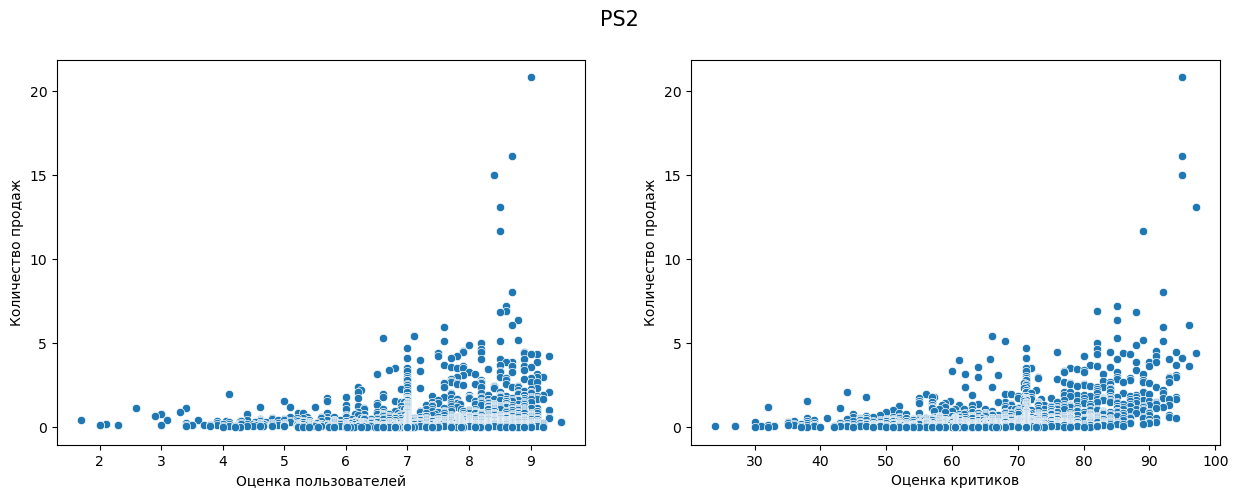



Корреляция между отзывами пользователями и продажами игровой платформой:  PS2
Слабая
0.21924666560959302
Корреляция между отзывами критиков и продажами игровой платформой:  PS2
Умеренная
0.34118254272529014


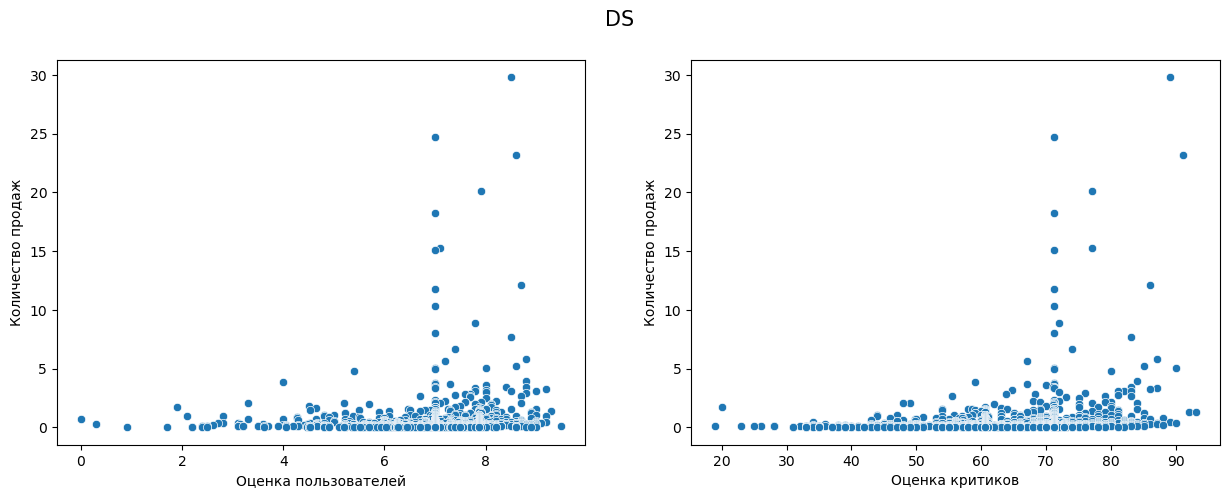



Корреляция между отзывами пользователями и продажами игровой платформой:  DS
Слабая
0.06846553055949721
Корреляция между отзывами критиков и продажами игровой платформой:  DS
Слабая
0.13702735274328556


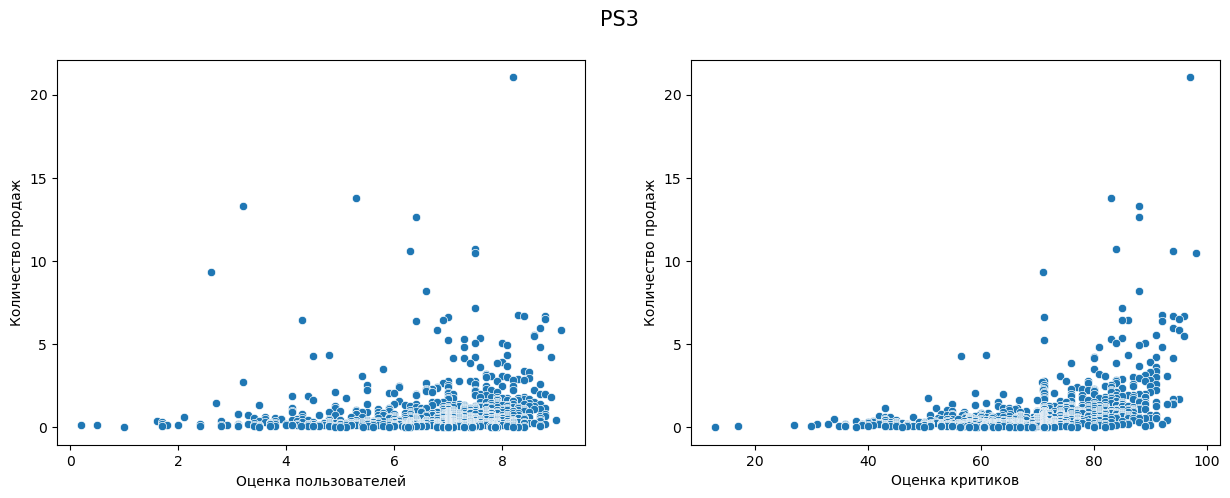



Корреляция между отзывами пользователями и продажами игровой платформой:  PS3
Слабая
0.08961218968717094
Корреляция между отзывами критиков и продажами игровой платформой:  PS3
Умеренная
0.3963787803868175


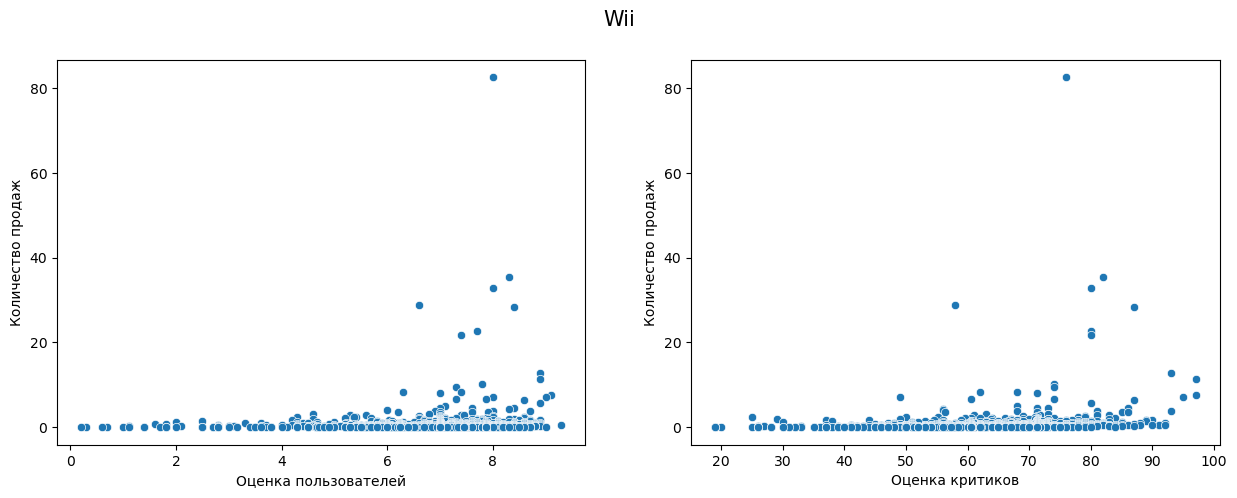



Корреляция между отзывами пользователями и продажами игровой платформой:  Wii
Слабая
0.07164152795808286
Корреляция между отзывами критиков и продажами игровой платформой:  Wii
Слабая
0.12898699342237416


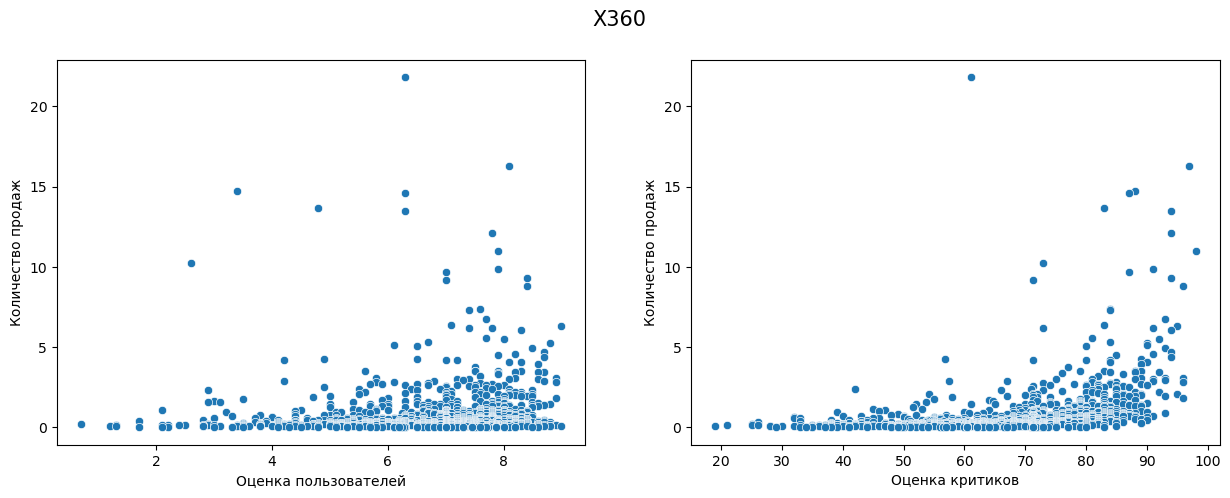



Корреляция между отзывами пользователями и продажами игровой платформой:  X360
Слабая
0.08585878837481041
Корреляция между отзывами критиков и продажами игровой платформой:  X360
Умеренная
0.36692345437329604


In [52]:
platform_scatter(platform_top_5_all)

Корреляция между оценками пользователей к объему продаж слабая, в то в время как с оценками критиков и проджами связь у некоторых платформ умеренная.
Соответственно, связь между данными тремя параметрами очень неустойчивая.

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. Высокие показатели могут быть обусловлены одной "стрельнувшей" игрой, но это не дает возможности судить о целом жанре. В данном случае рассмотреть медианные/средние продажи и посмотреть.

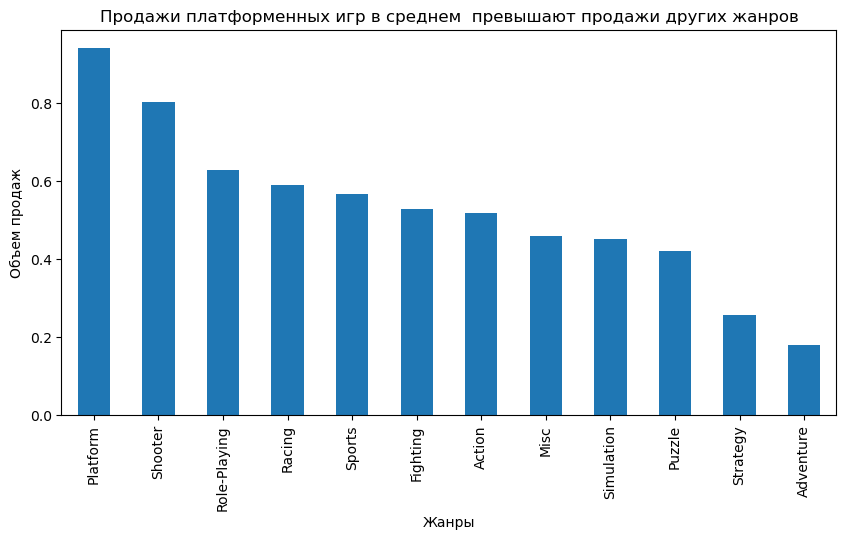

In [53]:
df_games.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values('total_sales', ascending=False).plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False)
plt.title("Продажи платформенных игр в среднем  превышают продажи других жанров")
plt.xlabel("Жанры")
plt.ylabel("Объем продаж")
plt.show()

Лучше всего продаются платформерные игры, затем идут шутеры, на последнем месте по продажам приключенческие игры.

**Выводы**
- с 1994 продажи игр стали расти до 2008-09 годов, после чего пошел значительный спад, и количество продаваемых игр сократилось примерно до уровня начала 00-ых.
- Самые популярные игровые платформы за весь период (в порядке убывания популярности) 'PS4', 'XOne', '3DS', 'PS3', 'X360'. 
- За последние 3 года в топ продаж выбились игровые платформы PS4 и XOne.
- Средний срок жизни платформы 10 лет. Пиковой популярности платформа достигает в среднем через 4 года после ее выхода в свет. 
- У всех платформ наблюдается умеренная зависимость между продажами и оценками пользователей, однако оценка критиков практически лишена влияния на спрос. 

**Шаг 4. Составление портрета пользователя каждого региона.**

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Напишем функцию, создающую сводные таблицы и строющую столбчатые диаграммы к ним для данных за весь период с привязкой к следующим параметрам:
- платформа
- жанр
- рейтинг ESRB

In [62]:
def region_pivot(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        ppivot = df_games.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().head(5)
        print(ppivot)
        print('\n\n') 
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
    plt.show()
        #sns.set()

Напишем функцию, создающую сводные таблицы и строющую столбчатые диаграммы к ним для данных за прошедший год.

In [76]:
def region_pivot_2016(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    temp = df_games[df_games['year_of_release']>2015]
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().head(5)
        print(ppivot)
        print('\n\n')
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
    plt.show()

Используем функции для отрисовки поведения пользователей в странах Северной Америки, Европы и Японии.

  platform  na_sales
0     X360    595.74
1      PS2    572.92
2      Wii    486.87
3      PS3    390.13
4       DS    380.31



      genre  na_sales
0    Action    863.17
1    Sports    671.20
2   Shooter    584.83
3  Platform    444.44
4      Misc    399.57



   rating  na_sales
0     1.0   1276.80
1     7.0   1225.84
2     5.0    747.60
3     4.0    742.89
4     2.0    345.50





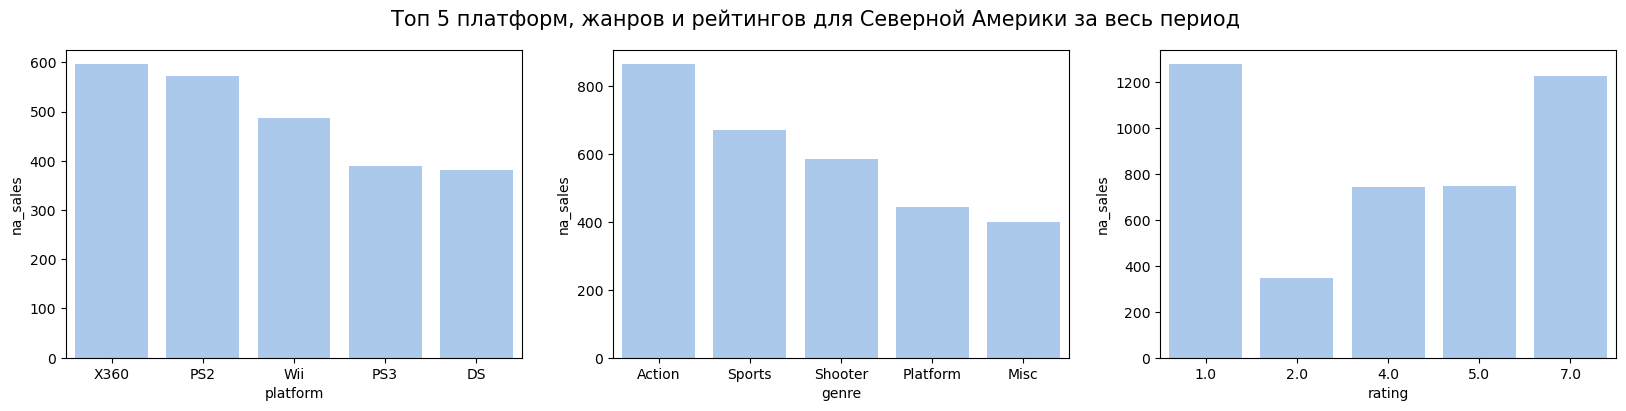

In [64]:
region_pivot('na_sales','Топ 5 платформ, жанров и рейтингов для Северной Америки за весь период')

  platform  na_sales
0      PS4     21.49
1     XOne     14.27
2      3DS      4.14
3     WiiU      2.10
4       PC      1.36



          genre  na_sales
0       Shooter     16.24
1        Action      9.29
2        Sports      7.54
3  Role-Playing      5.89
4      Fighting      1.84



   rating  na_sales
0     4.0     15.67
1     5.0      8.95
2     7.0      8.53
3     1.0      7.97
4     2.0      3.81





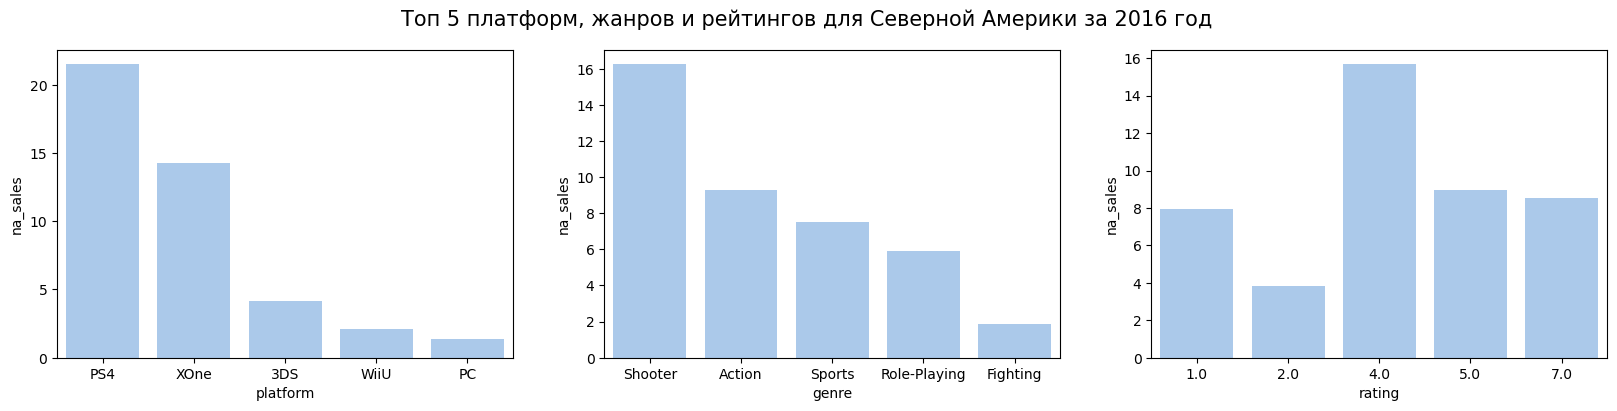

In [65]:
region_pivot_2016('na_sales','Топ 5 платформ, жанров и рейтингов для Северной Америки за 2016 год')

  platform  eu_sales
0      PS2    332.63
1      PS3    327.20
2     X360    268.32
3      Wii    258.32
4       PS    212.39



     genre  eu_sales
0   Action    510.99
1   Sports    371.32
2  Shooter    314.52
3   Racing    234.49
4     Misc    210.60



   rating  eu_sales
0     1.0    704.13
1     7.0    609.65
2     4.0    480.00
3     5.0    421.79
4     2.0    183.35





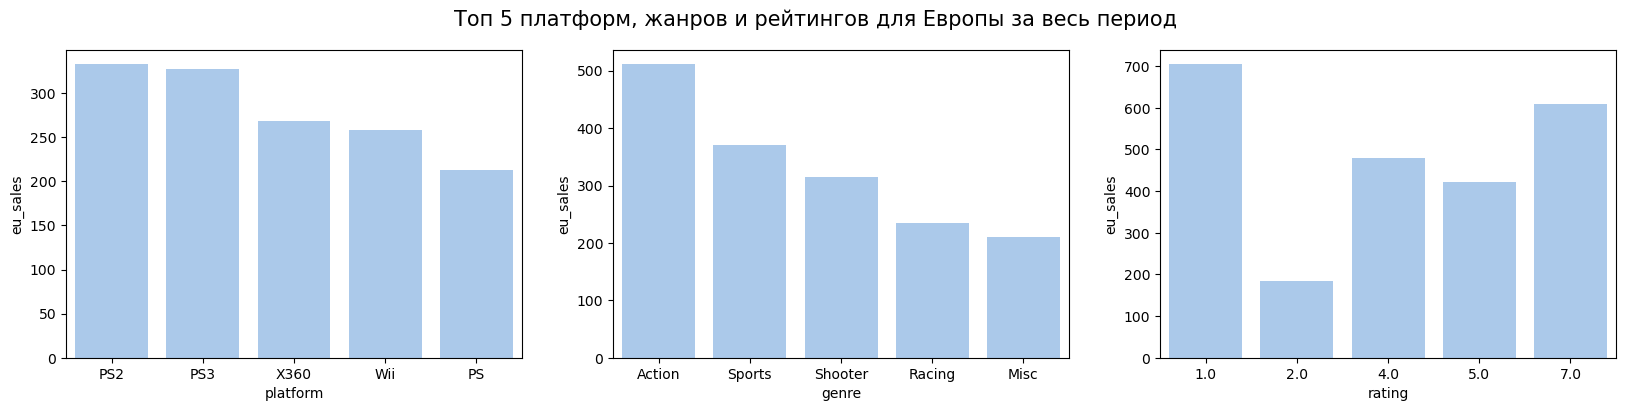

In [66]:
region_pivot('eu_sales','Топ 5 платформ, жанров и рейтингов для Европы за весь период')

  platform  eu_sales
0      PS4     31.78
1     XOne      9.63
2       PC      3.53
3      3DS      2.33
4     WiiU      1.48



          genre  eu_sales
0       Shooter     15.90
1        Sports     12.01
2        Action     10.68
3  Role-Playing      4.28
4        Racing      1.77



   rating  eu_sales
0     4.0     16.54
1     1.0     13.61
2     5.0      9.79
3     7.0      7.47
4     2.0      3.81





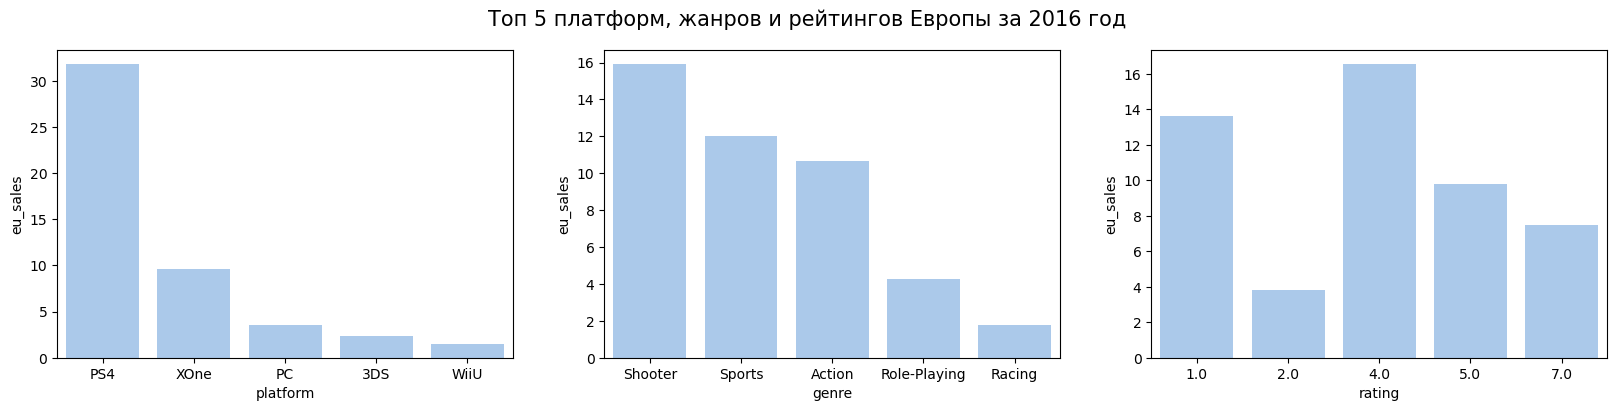

In [67]:
region_pivot_2016('eu_sales','Топ 5 платформ, жанров и рейтингов Европы за 2016 год')

  platform  jp_sales
0       DS    175.02
1       PS    139.78
2      PS2    137.54
3     SNES    116.55
4      3DS    100.62



          genre  jp_sales
0  Role-Playing    353.39
1        Action    160.14
2        Sports    134.93
3      Platform    130.71
4          Misc    107.02



   rating  jp_sales
0     7.0    836.74
1     1.0    199.42
2     5.0    150.70
3     4.0     63.58
4     2.0     40.20





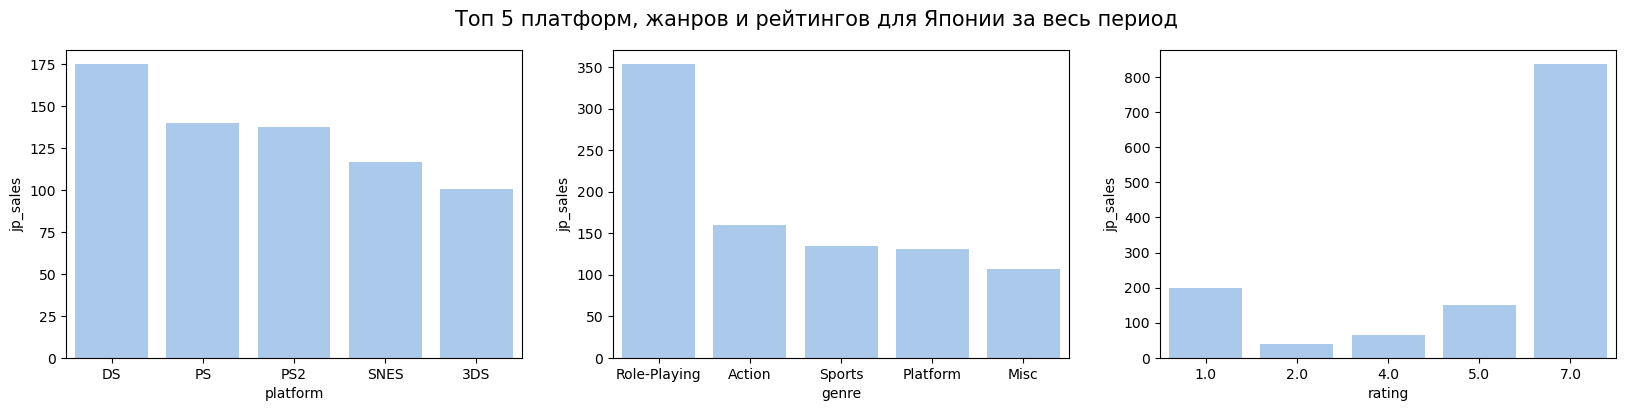

In [68]:
region_pivot('jp_sales','Топ 5 платформ, жанров и рейтингов для Японии за весь период')

  platform  jp_sales
0      3DS      8.03
1      PS4      5.74
2      PSV      3.56
3      PS3      1.30
4     WiiU      0.67



          genre  jp_sales
0        Action      7.07
1  Role-Playing      6.61
2     Adventure      1.18
3       Shooter      1.06
4          Misc      1.04



   rating  jp_sales
0     7.0     14.32
1     5.0      2.27
2     4.0      1.20
3     1.0      1.07
4     2.0      0.45





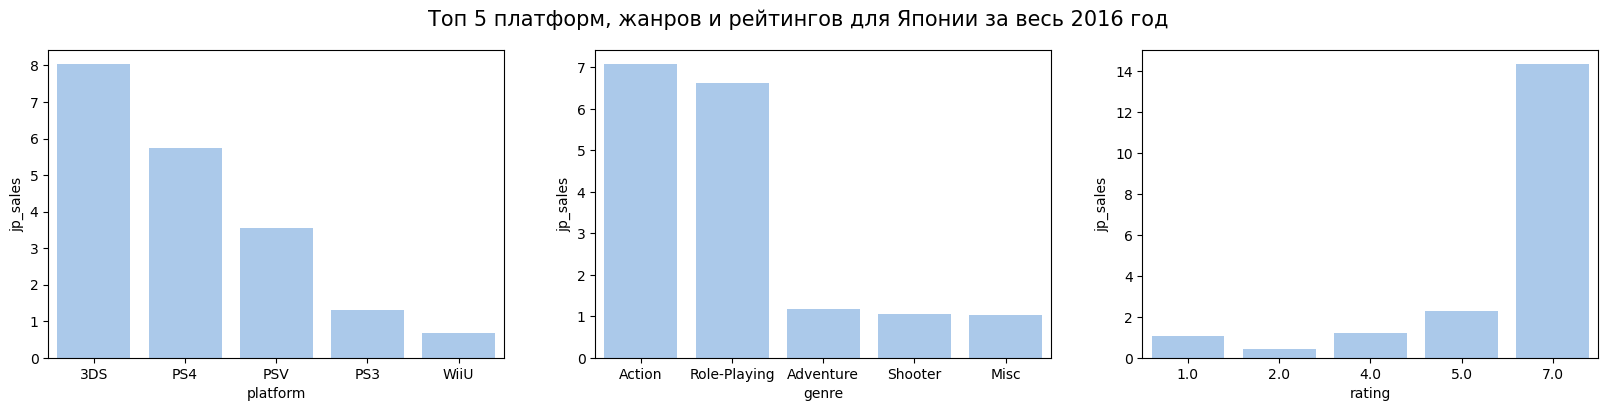

In [69]:
region_pivot_2016('jp_sales','Топ 5 платформ, жанров и рейтингов для Японии за весь 2016 год')

**Выводы:**

За весь период:

Северная Америка:

- Топ-3 игровые платформы: X360, PS2, WII.
- Топ-3 жанра: action, sports, shooter. 
- Топ-3 рейтингов: M (18+), затем идут игры E (для всех), и T игры для подростков (13+).

Европа:

- Топ-3 игровые платформы: PS2, PS3, X360.
- Топ-3 жанра: action, sports, shooter. 
- Топ-3 рейтингов: M (18+), E (для всех), и T игры для подростков (13+).

Япония:

- Топ-3 игровые платформы: DS, PS, PS2.
- Топ-3 жанра: role-playing, action, sports.
- Топ-3 рейтингов: M (18+), E (для всех), и T игры для подростков (13+).


За последний год:

Северная Америка:

- Топ-3 игровые платформы: PS4, XOne, 3DS.
- Топ-3 жанра: shooter, action, sports.
- Топ-3 рейтингов: M (18+), T (13+) и E (для всех).

В Европейском союзе:

- Топ-3 игровые платформы: PS4, XOne, PC.
- Топ-3 жанра: shooter, sports, action.
- Топ-3 рейтингов: M (18+), E (для всех) и T (13+).

Япония:

- Топ-3 игровые платформы: 3DS, PS4, PSV.
- Топ-3 жанра: action, role-playing, adventure.
- Топ-3 рейтингов: M (18+), T (13+) и E (для всех).

Мы видим, что взяв любой из период для оценки популярности игр, топ-3 возрастных рейтингов везде одинковые с небольшой разницей в их процентном соотношении.

Поскольку рынок IT развивается достаточно быстро, для анализа перспектив продаж мы взяли данные за прошедший (2016 год), что позволило сделать выводы о том, что наиболее успешными будут являться игры для взрослыз с рейтингом M (18+), а ниболее востребованными жанрами останутся shooter и action.


**Шаг 5. Проверка гипотез**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Зададим самостоятельно пороговое значение alpha.

**Проверим гипотезу** о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Возьмем данные за атуальный период (с 2014 года)

In [74]:
xone = df_games[(df_games['platform'] == 'XOne') & (df_games['year_of_release']>=2014)]['user_score']
pc = df_games[(df_games['platform'] == "PC") & (df_games['year_of_release']>=2014)]['user_score']

alpha = 0.01

results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Средние пользовательские рейтинги платформ Xbox One и PC различны.")
else:
    print("Не получилось отвергнуть нулевую гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.")

print(f'Средний пользовательский рейтинг XOne = {xone.mean()}')
print(f'Средний пользовательский рейтинг PC = {pc.mean()}')

p-значение: 0.06485231237548397
Не получилось отвергнуть нулевую гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Средний рейтинг XOne = 6.714144736842105
Средний рейтинг PC = 6.436754966887417


**Проверим гипотезу** о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем гипотезы:

- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [75]:
genre_action_hyp = df_games[(df_games['genre']=='Action') & (df_games['year_of_release']>=2014)]['user_score']
genre_sports_hyp = df_games[(df_games['genre']=='Sports') & (df_games['year_of_release']>=2014)]['user_score']

alpha = 0.01

results = st.ttest_ind(genre_action_hyp, genre_sports_hyp, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Средние пользовательские рейтинги жанров Action и Sports различаются.")
else:
    print("Не получилось отвергнуть нулевую гипотезу, что средние пользовательские рейтинги жанров Action и Sports одинаковые.")

print(f'Средний пользовательский рейтинг Action = {genre_action_hyp.mean()}')
print(f'Средний пользовательский рейтинг Sports = {genre_sports_hyp.mean()}')

p-значение: 2.4506358230589458e-14
Средние пользовательские рейтинги жанров Action и Sports различаются.
Средний рейтинг Action = 6.8974151857835215
Средний рейтинг Sports = 5.647826086956522


Выводы по проверке гипотез:

- **Не получилось отвергнуть** нулевую гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные **подтвердилась**. 

**Шаг 6. Общие выводы:**

- В процессе предобработки данных мы привели к нижнему регистру названия колонок и поменяли тип данных в некоторых столбцах.
- Выяснили, что аббревиатура TBD значит to be determined, to be done, поэтому заменили tbd на nan и обработали соответствующим образом.
- Выявили, что количество игр стало заметно расти с большой скоростью с 1994 до 2008 года. С 2008 года начался резкий спад продаж.
- За весь период самыми популярными приставками стали: PS2, X360, PS3, WII, DS, PS.
- За последние 3 года в топ продаж выбились игровые платформы PS4, XOne и 3DS.
- Средняя продолжительность жизни игровой приставки составляет около 10 лет. Пик продаж достигается примерно через 4 года после выхода в свет новой приставки.
- У WII был подъем продаж в 2009 году и сразу резкое падение в период до 2012 года.
- Проведя анализ взаимосвязи оценок пользователей и критиков с объемом продаж, мы определили, что оценки критиков в большей степени коррелируют с продажами, нежели оценки пользователей.
- Наиболее популярный жанр за все периоды это Shooter, наименее востребованный – Adventure.
- Не получилось отвергнуть нулевую гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные подтвердилась.

Портреты пользователей разных регионов. Выяснили, что: 
1.	В Северной Америке чаще пользуются приставками : XBOX, PS2 и WII. Наиболее популярные жанры: Action, Sports, Shooter.  По возрастному рейтингу: M (18+), затем идут игры E (для всех), и T игры для подростков (13+).
2.	В Европе, популярны те же жарны и те же возрастные рейтинги, что и в Северной Америке. Популярны приставки: PS2, PS3, XBOX. 
3.	В Японии пользователи предпочитают игровые приставки: DS, PS, PS2. Жанры игры: Role-playing, Action и Sports. Рейтинг игр соответствует рейтингам Северной Америки и Европы.


Рекомендации:
- На 2017 год наиболее актуальной приставкой вероятно, будет являться PS4, следовательно она же будет и наиболее перспективной с точки зрения продаж и разработок игр.
- Наиболее востребованными являются игры с жанром Shooter с рейтингом M (18+), производство которых будет способствовать более высоким объемам продаж.
